In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/NaturalGas.csv")

In [3]:
df.head()

,Unnamed: 0,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42


In [4]:
# Filtering and Analyse the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Encoding the object dtype to int64

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['state']=le.fit_transform(df['state'])

In [7]:
# calculate stat of each columns

df.describe()

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
count,138.000000,138.00000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2.500000,27.00000,1978.000000,252901.478261,3.422319,5.053551,24.635580,3.207681,4154.528986,11193.235652
std,1.714047,15.68811,6.657415,184478.131559,2.169215,2.577859,15.401018,2.124937,2451.998462,1906.726093
min,0.000000,5.00000,1967.000000,9430.000000,0.680000,1.980000,5.010000,0.680000,481.000000,7465.340000
25%,1.000000,10.00000,1972.000000,49103.500000,1.380000,2.432500,8.240000,1.257500,2081.500000,9637.165000
50%,2.500000,29.00000,1978.000000,300835.500000,2.775000,4.520000,19.865000,2.615000,4272.000000,11367.460000
75%,4.000000,44.00000,1984.000000,346428.750000,5.310000,7.282500,40.102500,5.192500,6498.000000,12125.335000
max,5.000000,45.00000,1989.000000,637289.000000,8.060000,10.860000,51.730000,7.870000,7440.000000,16425.330000


In [8]:
# find null values

df.isna().sum()

state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64

In [9]:
df.corr()

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
state,1.000000e+00,9.801976e-01,-1.166722e-14,-0.487579,-0.119752,-0.008119,-0.068904,-0.119282,0.466906,-0.518112
statecode,9.801976e-01,1.000000e+00,-8.712084e-15,-0.354773,-0.112909,0.017690,-0.063556,-0.112457,0.461756,-0.424075
year,-1.166722e-14,-8.712084e-15,1.000000e+00,-0.019843,0.885261,0.905776,0.840217,0.879380,-0.014169,0.642439
consumption,-4.875794e-01,-3.547734e-01,-1.984306e-02,1.000000,-0.109541,0.045979,0.013371,-0.110035,0.114430,0.558559
price,-1.197523e-01,-1.129095e-01,8.852612e-01,-0.109541,1.000000,0.935463,0.856882,0.985123,-0.142188,0.658469
eprice,-8.119349e-03,1.768969e-02,9.057763e-01,0.045979,0.935463,1.000000,0.875059,0.924900,0.080426,0.709568
oprice,-6.890435e-02,-6.355616e-02,8.402169e-01,0.013371,0.856882,0.875059,1.000000,0.808498,0.002448,0.595618
lprice,-1.192817e-01,-1.124573e-01,8.793796e-01,-0.110035,0.985123,0.924900,0.808498,1.000000,-0.141117,0.663339
heating,4.669062e-01,4.617559e-01,-1.416930e-02,0.114430,-0.142188,0.080426,0.002448,-0.141117,1.000000,-0.090510
income,-5.181119e-01,-4.240753e-01,6.424389e-01,0.558559,0.658469,0.709568,0.595618,0.663339,-0.090510,1.000000


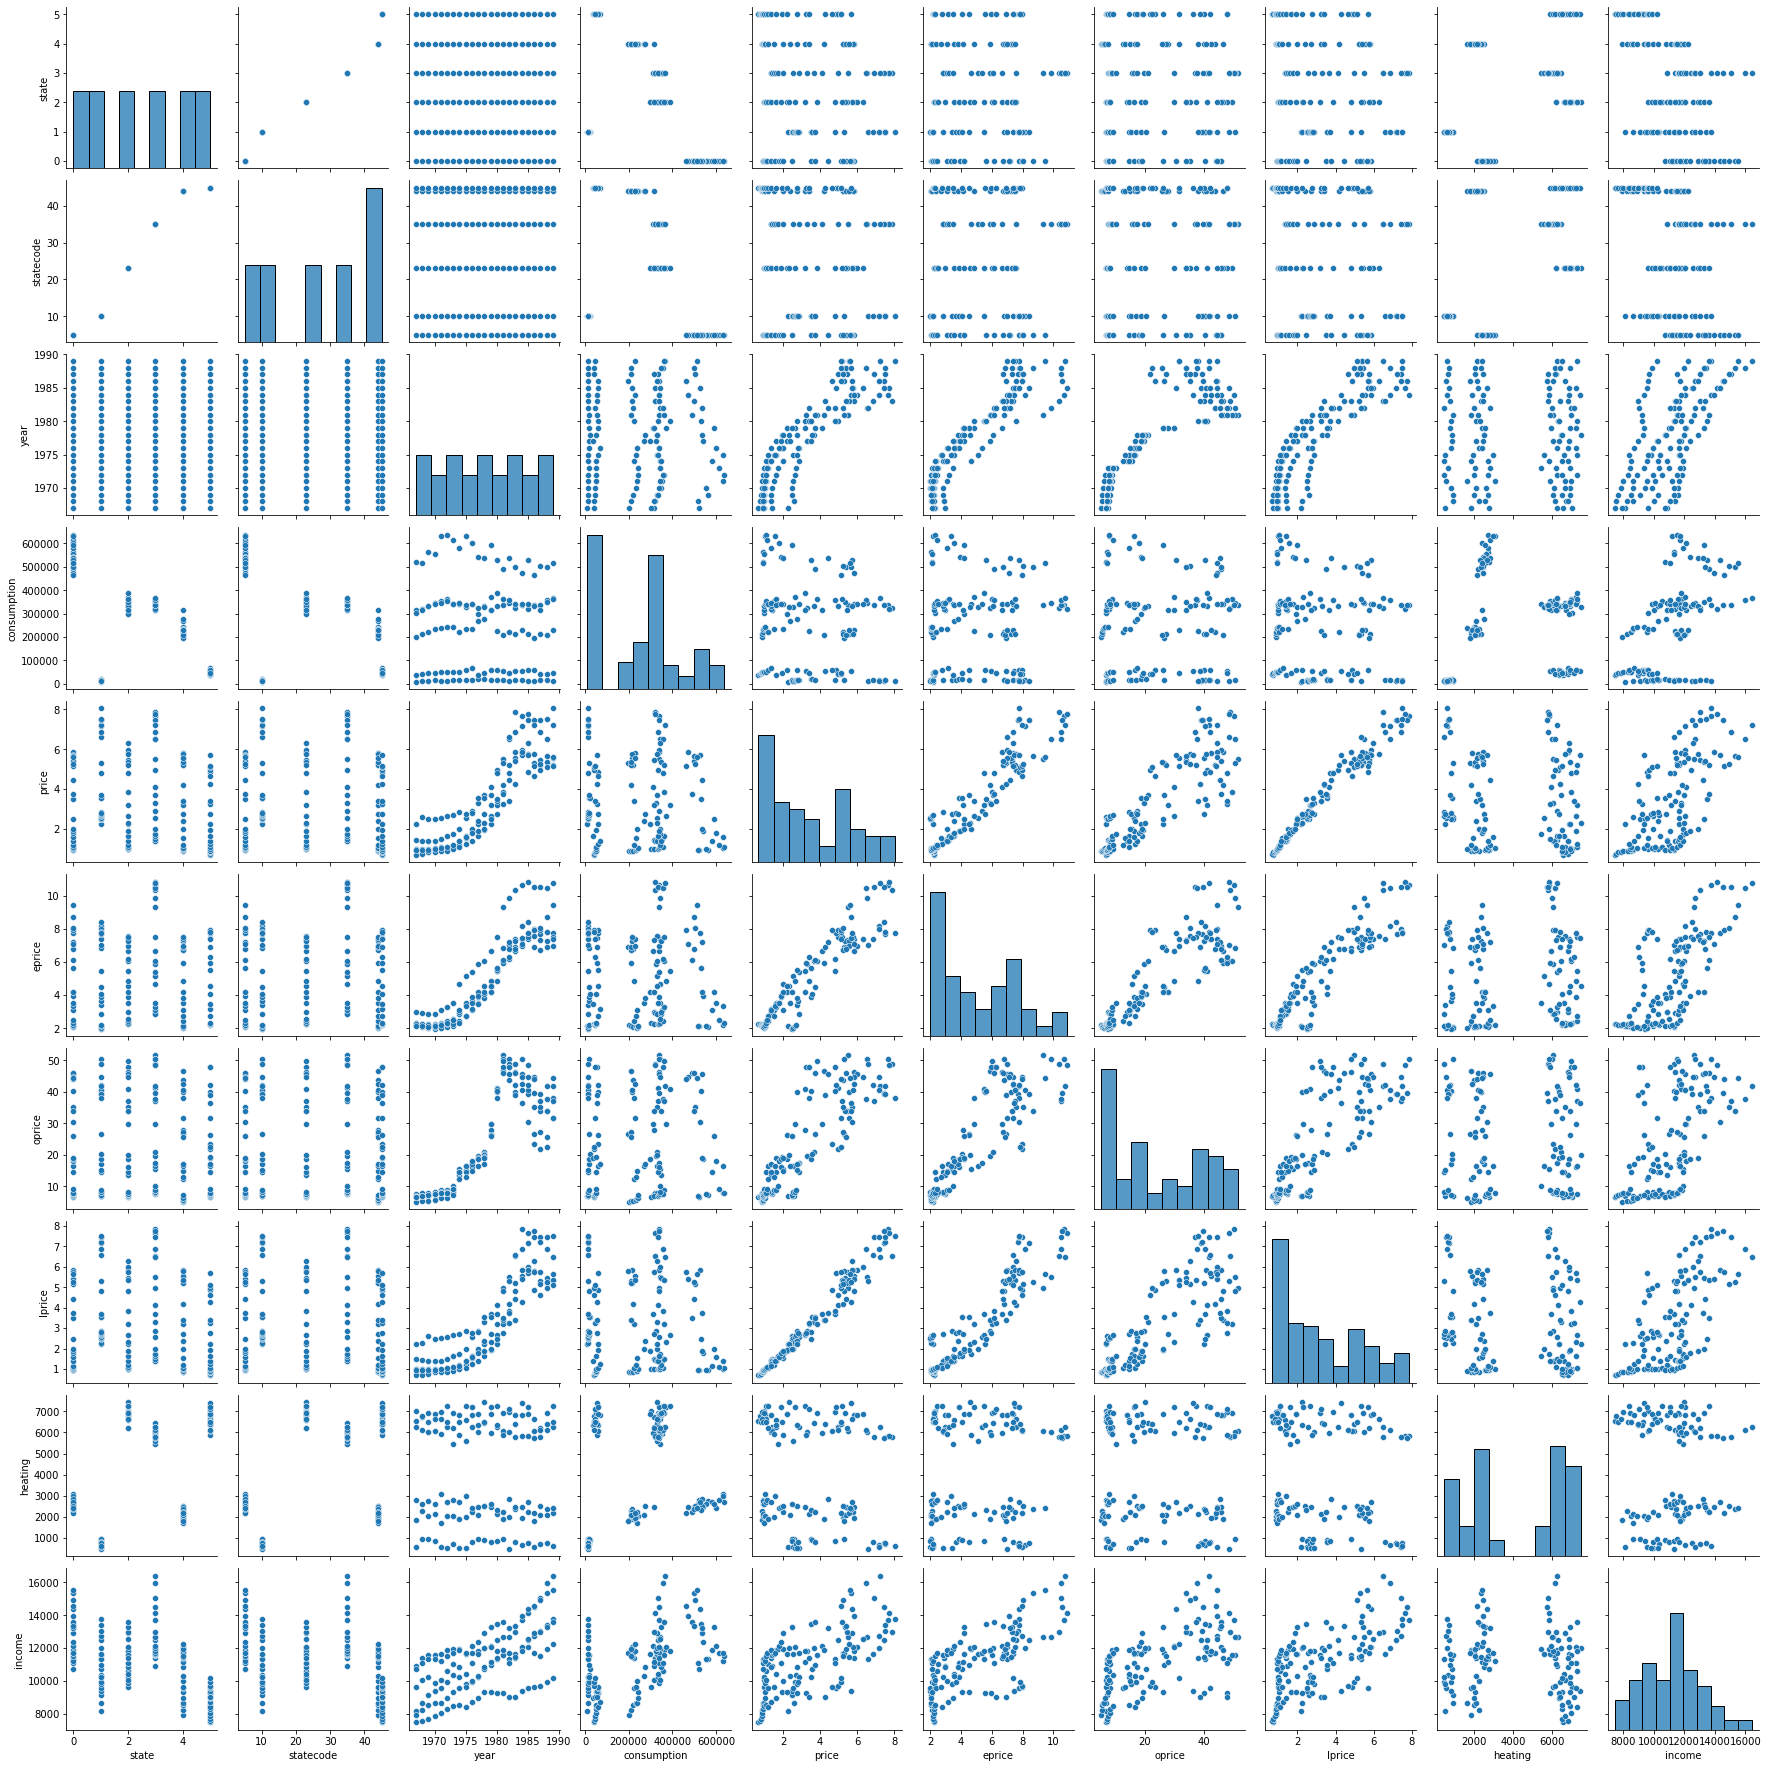

In [10]:
# visualize the data 

sns.pairplot(df)

<AxesSubplot:>

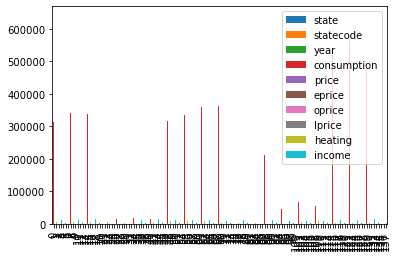

In [11]:
df.plot(kind='bar')

In [12]:
df.columns

Index(['state', 'statecode', 'year', 'consumption', 'price', 'eprice',
       'oprice', 'lprice', 'heating', 'income'],
      dtype='object')

In [13]:
df.shape

(138, 10)

In [14]:
x= df.iloc[:,0:9]
y= df.iloc[:,-1]

In [15]:
x.shape

(138, 9)

In [16]:
x

,state,statecode,year,consumption,price,eprice,oprice,lprice,heating
0,3,35,1967,313656,1.42,2.98,7.40,1.47,6262
1,3,35,1968,319282,1.38,2.91,7.77,1.42,6125
2,3,35,1969,331326,1.37,2.84,7.96,1.38,6040
3,3,35,1970,346533,1.40,2.87,8.33,1.37,6085
4,3,35,1971,352085,1.50,3.07,8.80,1.40,5907
...,...,...,...,...,...,...,...,...,...
133,0,5,1985,527495,5.72,7.78,30.58,5.84,2694
134,0,5,1986,464307,5.14,7.95,44.15,5.72,2192
135,0,5,1987,503473,5.26,8.03,35.24,5.14,2502
136,0,5,1988,497138,5.64,8.69,34.02,5.26,2366


In [17]:
y

0      10903.75
1      11370.02
2      11578.68
3      11586.77
4      11657.42
         ...   
133    14368.46
134    14580.77
135    14915.05
136    15340.38
137    15532.93
Name: income, Length: 138, dtype: float64

In [18]:
# Preparing the model on basis of 80% train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_1=LinearRegression().fit(x_train, y_train)

In [19]:
print(model_1.score(x_train, y_train))
print(model_1.score(x_test, y_test))

0.9051027114391933
0.9404632086131185


In [20]:
# Build a model by using ordinary least square regression method

import statsmodels.formula.api as smf 
Model_2 = smf.ols('y~x',data=df).fit()
print(Model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     151.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           8.96e-64
Time:                        00:31:36   Log-Likelihood:                -1068.3
No. Observations:                 138   AIC:                             2157.
Df Residuals:                     128   BIC:                             2186.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.998e+05   4.18e+04     -4.779      0.0

In [21]:
# Use polynomial method for over fitting the model

from sklearn.preprocessing import PolynomialFeatures
x_poly=PolynomialFeatures(degree=2).fit_transform(x)

In [22]:
x_polytrain,x_polytest,y_train,y_test=train_test_split(x_poly,y,test_size=0.3)
Model_3 = LinearRegression().fit(x_polytrain,y_train)

In [23]:
print(Model_3.score(x_polytrain,y_train))
print(Model_3.score(x_polytest,y_test))

0.11650389285801988
-0.12270856262949636


In [24]:
m1pred= model_1.predict(x)

In [25]:
m2pred=Model_2.predict(x)

In [26]:
m3pred=Model_3.predict(x_poly)

In [27]:
# Prediction Analayzed of models

df = pd.DataFrame({'Actual':y , 'Predict_1':m1pred, 'Predict_2':m2pred, 'Predict_3':m3pred})
df

,Actual,Predict_1,Predict_2,Predict_3
0,10903.75,10396.425538,10339.685155,9883.131390
1,11370.02,10466.417190,10403.177724,10664.852913
2,11578.68,10538.231095,10465.908761,11437.036045
3,11586.77,10652.399296,10572.537580,11958.737011
4,11657.42,10788.852388,10714.309818,12418.389424
...,...,...,...,...
133,14368.46,14406.144683,14339.504036,10879.746020
134,14580.77,14476.505049,14454.165598,13107.574642
135,14915.05,14628.584832,14606.285018,14352.831388
136,15340.38,14895.617237,14895.858255,15797.082885
